## 1. Import Library dan Load Audio

Durasi sinyal: 5.00 detik


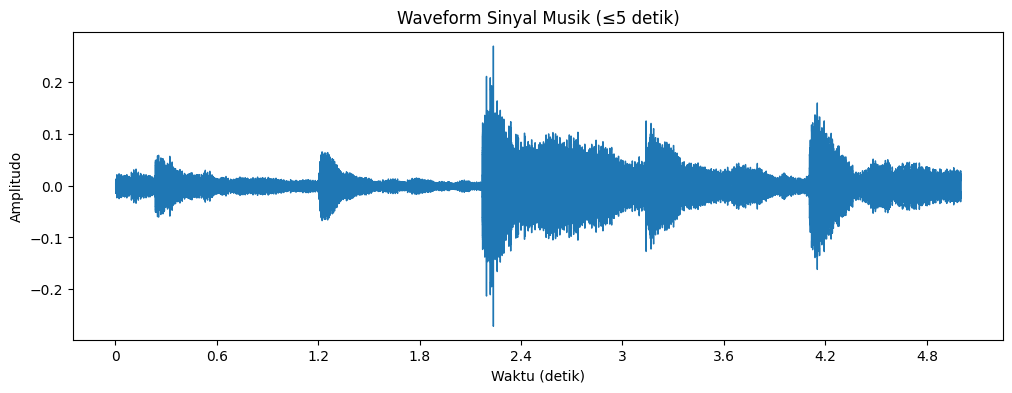

In [4]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
from scipy.fft import fft, ifft
import numpy as np

audio_path = "/kaggle/input/piece-of-music/music-klip-wuwa/The Lost Beyond 5s.wav"

# Load audio
y, sr = librosa.load(audio_path, sr=None)

# Potong maksimal 5 detik
y = y[:sr*5]

print(f"Durasi sinyal: {len(y)/sr:.2f} detik")

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform Sinyal Musik (≤5 detik)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.show()

## 2. (FFT) Transformasi ke Domain Frekuensi
FFT digunakan untuk mengubah sinyal waktu menjadi spektrum frekuensi. Dari grafik terlihat adanya puncak pada frekuensi dominan.

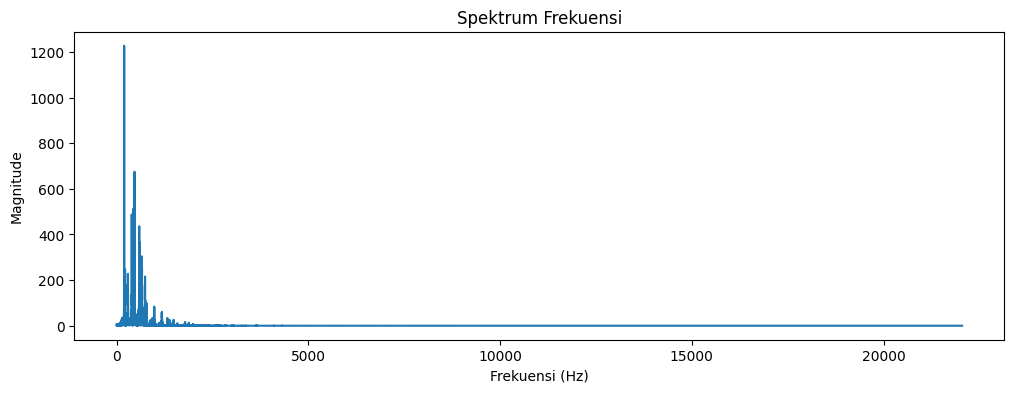

Frekuensi dominan: 195.80 Hz


In [5]:
# FFT
Y = fft(y)
N = len(Y)
freq = np.fft.fftfreq(N, 1/sr)

# Magnitude spektrum
magnitude = np.abs(Y)

# Plot spektrum
plt.figure(figsize=(12, 4))
plt.plot(freq[:N//2], magnitude[:N//2])  # hanya setengah spektrum
plt.title("Spektrum Frekuensi")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitude")
plt.show()

# Cari frekuensi dominan
dom_freq = freq[np.argmax(magnitude[:N//2])]
print(f"Frekuensi dominan: {dom_freq:.2f} Hz")


## Identifikasi Frekuensi Dominan
Hasil analisis menunjukkan frekuensi dominan sekitar **195.80 Hz**.

## 3. Rekonstruksi ke Domain Waktu
IFFT digunakan untuk mengembalikan sinyal ke bentuk waktu dengan hasil yang mirip sinyal aslinya.

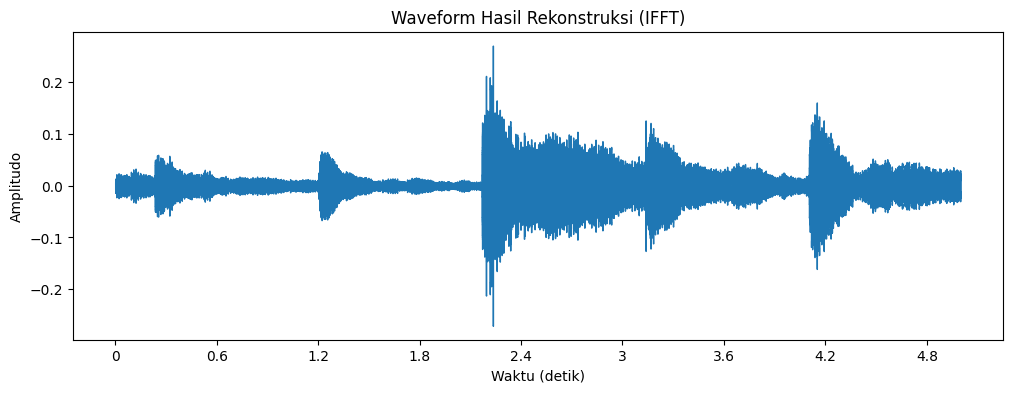

In [6]:
# IFFT
y_reconstructed = ifft(Y).real

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_reconstructed, sr=sr)
plt.title("Waveform Hasil Rekonstruksi (IFFT)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.show()


## 4. Refleksi
Dari eksperimen ini, saya belajar bahwa FFT dan IFFT memungkinkan kita menganalisis karakteristik frekuensi sinyal musik serta membangun kembali bentuk gelombang aslinya.